In [2]:
#Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_GR = df[(df["job_title"] == "Data Analyst") & (df["job_country"] == "Greece")].copy()

In [4]:
df_DA_GR["job_posted_month_no"] = df_DA_GR["job_posted_date"].dt.month

In [5]:
df_DA_GR_explode = df_DA_GR.explode("job_skills")

In [6]:
df_DA_GR_pivot = df_DA_GR_explode.pivot_table(index="job_posted_month_no", columns="job_skills", aggfunc="size", fill_value=0)

df_DA_GR_pivot.loc["Total"] = df_DA_GR_pivot.sum()

df_DA_GR_pivot[df_DA_GR_pivot.loc["Total"].sort_values(ascending=False).index]

df_DA_GR_pivot = df_DA_GR_pivot.drop("Total")

df_DA_GR_pivot

job_skills,alteryx,aws,azure,bash,bigquery,cognos,dax,excel,express,flow,...,sharepoint,spark,spss,sql,sql server,ssis,ssrs,tableau,terminal,vba
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,0,1,2,0,0,0,0,8,0,0,...,0,0,1,10,0,0,0,3,0,0
2,0,0,0,0,0,0,0,6,0,0,...,0,0,0,7,2,0,0,2,0,0
3,0,0,0,0,0,0,0,4,0,0,...,0,0,0,2,0,0,0,1,0,0
4,0,0,0,0,0,0,0,2,0,0,...,0,0,2,6,0,0,0,3,0,0
5,0,0,1,0,0,0,1,0,1,0,...,0,0,2,4,0,1,1,0,1,0
6,0,0,0,1,0,1,0,3,0,0,...,0,0,0,4,0,0,0,3,0,0
7,3,0,0,0,0,0,0,6,0,2,...,0,0,3,8,0,0,0,2,0,0
8,0,0,0,0,0,0,0,1,1,0,...,0,0,0,3,0,0,0,0,1,0
9,0,0,0,0,0,0,0,4,0,0,...,1,1,1,2,0,0,0,2,0,0


<Axes: xlabel='job_posted_month_no'>

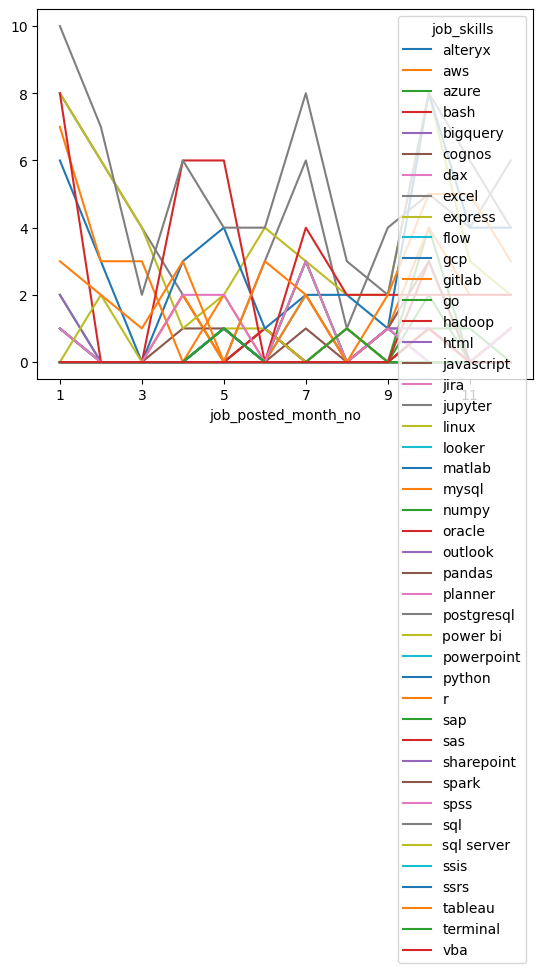

In [7]:
df_DA_GR_pivot.plot(kind='line')

In [8]:
DA_totals = df_DA_GR.groupby("job_posted_month_no").size()

In [9]:
df_DA_GR_percent = df_DA_GR_pivot.div(DA_totals/100, axis=0)

In [10]:
#changes month number to month name
df_DA_GR_percent = df_DA_GR_percent.reset_index()
df_DA_GR_percent["job_posted_month"] = df_DA_GR_percent["job_posted_month_no"].apply(lambda x: pd.to_datetime(x, format="%m").strftime("%b"))
df_DA_GR_percent = df_DA_GR_percent.set_index("job_posted_month")
df_DA_GR_percent = df_DA_GR_percent.drop(columns="job_posted_month_no")


df_DA_GR_percent.head(6)

job_skills,alteryx,aws,azure,bash,bigquery,cognos,dax,excel,express,flow,...,sharepoint,spark,spss,sql,sql server,ssis,ssrs,tableau,terminal,vba
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,0.0,5.263158,10.526316,0.000000,0.0,0.000000,0.0,42.105263,0.0,0.0,...,0.0,0.0,5.263158,52.631579,0.0,0.0,0.0,15.789474,0.0,0.0
Feb,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,60.000000,0.0,0.0,...,0.0,0.0,0.000000,70.000000,20.0,0.0,0.0,20.000000,0.0,0.0
Mar,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,66.666667,0.0,0.0,...,0.0,0.0,0.000000,33.333333,0.0,0.0,0.0,16.666667,0.0,0.0
Apr,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,28.571429,0.0,0.0,...,0.0,0.0,28.571429,85.714286,0.0,0.0,0.0,42.857143,0.0,0.0
May,0.0,0.000000,12.500000,0.000000,0.0,0.000000,12.5,0.000000,12.5,0.0,...,0.0,0.0,25.000000,50.000000,0.0,12.5,12.5,0.000000,12.5,0.0
Jun,0.0,0.000000,0.000000,16.666667,0.0,16.666667,0.0,50.000000,0.0,0.0,...,0.0,0.0,0.000000,66.666667,0.0,0.0,0.0,50.000000,0.0,0.0


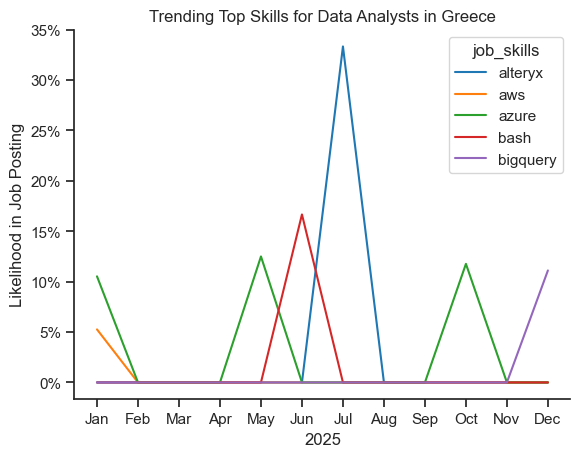

In [18]:
df_plot = df_DA_GR_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette="tab10")
sns.despine()
sns.set_theme(style="ticks")

plt.title("Trending Top Skills for Data Analysts in Greece")
plt.ylabel("Likelihood in Job Posting")
plt.xlabel("2025")

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))


plt.show()